# <center> Часть 2. Python

**Дан датасет со значениями веса и роста человека.**

**Построить линейную регрессионную модель, предсказывающую рост человека по его весу.
Дополнительно, оценить ее качество на данном датасете.**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
from _plotly_future_ import v4_subplots 
from plotly.offline import init_notebook_mode, iplot
import plotly

import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
height    100 non-null float64
weight    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.head()

,height,weight
0,186.63,90.97
1,169.75,62.76
2,168.66,56.16
3,173.03,64.37
4,172.21,64.71


### Корреляция наших данных

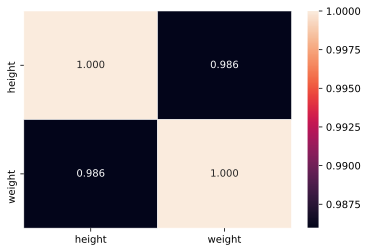

In [20]:
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=0.5)

### Данные имеют отличную корреляцию. Посмотрим подробнее на зависимость роста от веса.

In [6]:
trace = [go.Scatter(
            x = df.weight,
            y = df.height,
            mode='markers'
        )]

layout = go.Layout(
    title='Зависимость роста от веса.',
    yaxis_title='Рост, см',
    xaxis_title='Вес, кг',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1),
    ]))

fig = {'data': trace, 'layout': layout}
iplot(fig, show_link=False)

### Видно, что зависимость линейная. Будем использовать LinearRegression из библиотеки sklearn.

In [8]:
X = np.array(df['weight']).reshape(-1,1)
y = np.array(df['height']).reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

### Разделим на обучающаю и тестовую выборку.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_test_predict = reg.predict(X_test)

In [14]:
metrics_columns = ['Mean absolute error', 'RMSE', 'R2 score']
metrics_scores_test = np.array([
    mean_absolute_error(y_test, y_test_predict),
    (mean_squared_error(y_test, y_test_predict))**0.5,
    r2_score(y_test, y_test_predict)
]).reshape(1, 3)
index = ['LinearRegression']

metrics_test_df = pd.DataFrame(metrics_scores_test, index=index, columns=metrics_columns).T

### Посмотрим на наши метрики на тестовой выборке.

In [15]:
metrics_test_df

,LinearRegression
Mean absolute error,1.554183
RMSE,1.720695
R2 score,0.954069


### Качество, как и ожидалось, хорошее.

In [16]:
traces = []
traces.append(go.Scatter(
            x = y_test.ravel(),
            y = y_test_predict.ravel(),
            name = 'Predict',
            mode = 'markers'
        ))

traces.append(go.Scatter(
            x = np.linspace(y_test.min(), y_test.max(), 2),
            y = np.linspace(y_test.min(), y_test.max(), 2),
            name = 'True',
            mode='lines'
        ))

layout = go.Layout(
    title='Сравнение истинного значения роста и предсказаного',
    yaxis_title='Истинное значение роста',
    xaxis_title='Предсказанное значение роста',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1),
    ]))

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [17]:
print('Коэффициенты: a = {:.3f}, b = {:.3f}'.format(reg.coef_[0][0], reg.intercept_[0]))

Коэффициенты: a = 0.600, b = 132.683


In [18]:
def y(x):
    return reg.coef_[0][0]*x + reg.intercept_[0]

In [19]:
np.allclose(y_test_predict, y(X_test))

True

### Наша линейная зависимость выражается с помощью уравнения: $ y(x) = ax + b $, где
### a = 0.6, b = 132.7